In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sc
import pandas as pd
import math 

In [2]:
#Исходные данные
v_liq = 80 #V_ж - [m^3] - объемн жидкости
sigma = 0.073   # sigma -[м^2] - площадь поперечного сечения
kpr = 5e-15    # kpr - [м^2] - проницаемость
mu = 3e-4    # mu - [Pa*c] - вязкость
f = 0.3 # [] - пористость
c = 1.47*1e-3 # [1/MPa] - сжимаемость флюида
cf = 1 * 1e-3 # [1/MPa] - сжимаемость породы
ct = (c + cf) # [1/MPa] - общая породы
k = kpr / (mu * f * ct)    # k - [м^2/с] - пьезопроводность пласта
betta = f * ct    # betta - [MPa^(-1)] коэффициент упругоемкости пласта
qc = 0.00092    # Qc - [m^3/с] - объемный дебит жидкости
b = 10    # b -[м]- толщина пласта

    # t -[c] - время
    # xi -[м] - расстояние
    
    

# Формула, связывающая коэффициенты пьезопроводности, проницаемости и упрогоемкости пласта.
## Формула (3.44) стр 121
$$ Q_\xi = \dfrac{V_ж}{Г(\dfrac{1+\alpha}{2})}\dfrac{(\dfrac{\xi^2}{4\kappa t})^{\dfrac{1+\alpha}{2}}}{t}\exp^{-\dfrac{\xi^2}{4\kappa t}}$$

In [3]:
def q_xi_a(a, t, xi, v_liq = v_liq, k = k):
    # V_ж - [m^3] - объемн жидкости
    # k - [м^2/с] - пьезопроводность пласта
    # t -[c] - время
    # xi -[м] - расстояние
    return v_liq / sc.gamma((1 + a) / 2) * (xi ** 2 / (4 * k * t)) ** ((1 + a) / 2)/ t * np.exp(-xi ** 2 / 4 / k / t)

## Формула (3.48) стр. 122
$$ V_\xi = \dfrac{V_ж}{Г(\dfrac{1+\alpha}{2})}Г(\dfrac{1+\alpha}{2},\dfrac{\xi^2}{4\kappa t})$$

In [4]:
def v_xi_a(a, t, xi, v_liq = v_liq, k = k):
    # V_ж - [m^3] - объемн жидкости
    # k - [м^2/с] - пьезопроводность пласта
    # t -[c] - время
    # xi -[м] - расстояние
    return v_liq / sc.gamma((1 + a) / 2) * sc.gamma((1 + a) / 2)*(1-sc.gammainc((1 + a) / 2, xi ** 2 / 4 / k / t))

In [5]:
#ВАЖНО
#Неполная гамма функция для sc
sc.gamma(1/2)*(1-sc.gammainc(1/2,1))

0.2788055852806615

# $$\alpha = 2$$
# Радиальный поток к точечному стоку с постоянным дебитом

## Фундаментальное решение для уравнения пьезопроводности для случая плоско-радиального потока 
### Формула (3.30) стр 111
$$ \Delta P = ± \dfrac{V_ж}{8{(\pi \kappa t)}^{\dfrac{3}{2}}\beta^*} \exp^{-\dfrac{\xi^2}{4\kappa t}} $$





In [6]:
def deltaP_2(t, xi, v_liq = v_liq, betta = betta, k = k):
    # t - [c]- время
    # xi -[м]- расстояние
    return v_liq / 8 /(3.14 * k * t) ** (3/2) / betta * np.exp(-xi ** 2 / 4 / k/ t)

# Работа с постоянным дебитом

## Формула, позволяющая определить понижение давления в любой момент времени в любой точке пласта после пуска точечного стока с постоянным дебитом
### Формула (4.12) стр. 130
$$\Delta p = \dfrac{Q_c \mu }{8 \pi Г(\dfrac{3}{2}) k \xi} Г(\dfrac{1}{2},\dfrac{\xi^2}{4kt})$$

### Формула (4.15) стр. 131
$$\Delta p = \dfrac{Q_c \mu }{4 \pi k \xi}erfc\sqrt{\dfrac{\xi^2}{4\kappa t}}$$

In [7]:
def deltaP_Qc_2(t, xi, qc = qc, mu = mu, betta = betta, k = k, kpr = kpr):
    # t -[c]- время
    # xi -[м]- расстояние
    return qc * mu / (4 * 3.14 * kpr * xi) * sc.erfc((xi ** 2 / 4 / k / t) ** (1 / 2))

## Расаход. жидкости $$Q_\xi$$  через поперечное сечение потока $$ \xi = const $$
### Формула (4.21) стр. 132
$$Q_\xi=Q_c (erfc\sqrt{\dfrac{\xi^2}{4\kappa t}}+\dfrac{2}{\sqrt{\pi}}\sqrt{\dfrac{\xi^2}{4\kappa t}} \exp^{-\dfrac{\xi^2}{4\kappa t}})$$

In [8]:
def q_xi_Qc_2(t, xi, qc = qc, k = k):
    # t -[c]- время
    # xi -[м]- расстояние
    return qc * (2 / (3.14) ** (1 / 2) * (xi ** 2 / 4 / k / t) ** (1/2) * np.exp(-xi ** 2 / 4 / k / t)+ sc.erfc((xi ** 2 / 4 / k / t)**(1 / 2)))

## Количество жидкости, которая к моменту времени t протечет через постоянное сечение потока
### Формула (4.30) стр. 134
$$ V_\xi = Q_c* t *(erfc\sqrt{-\dfrac{\xi^2}{4\kappa t} } + 2\sqrt{-\dfrac{\xi^2}{4\kappa t} } ierfc\sqrt{-\dfrac{\xi^2}{4\kappa t} })$$




In [9]:
def v_xi_Qc_2(t, xi, qc = qc, k = k):
    # t -[c]- время
    # xi -[м]- расстояние
    return qc * t * (sc.erfc((xi ** 2 / 4 / k / t)**(1 / 2)) + 2 * (xi ** 2 / 4 / k / t)**(1 / 2) * (1 / (3.14) ** (1 / 2) * np.exp(-xi ** 2 / 4 / k / t)-(xi ** 2 / 4 / k / t)**(1 / 2)*sc.erfc((xi ** 2 / 4 / k / t)**(1 / 2))))



## График понижения пластового давления
## рис. 4.3

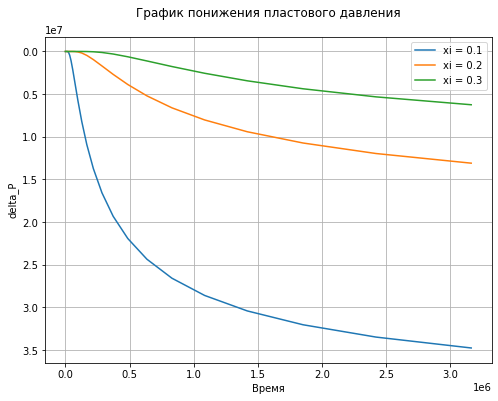

In [16]:
t = np.logspace(-5,6.5,100)
xi_1 = 0.1
xi_2 = 0.2
xi_3 = 0.3


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(t,deltaP_Qc_2(t,xi_1), label = 'xi = {}'.format(xi_1))
ax1.plot(t,deltaP_Qc_2(t,xi_2), label = 'xi = {}'.format(xi_2))
ax1.plot(t,deltaP_Qc_2(t,xi_3), label = 'xi = {}'.format(xi_3))


ax1.grid()
ax1.set(title = "")
ax1.set_xlabel("Время")
ax1.set_ylabel("delta_P")
plt.gca().invert_yaxis()
ax1.set_title('''График понижения пластового давления''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)


ax1.legend()
plt.show()

## График пьезометрических линий в различные моменты времени
## рис. 4.6

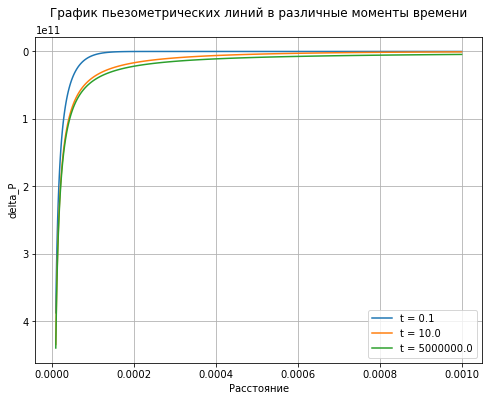

In [30]:
xi = np.logspace(-5,-3,100)
t_1 = 1e-1
t_2 = 1e1
t_3 = 5e6


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
plt.gca().invert_yaxis()
ax1.plot(xi,deltaP_Qc_2(t_1,xi), label = 't = {}'.format(t_1))
ax1.plot(xi,deltaP_Qc_2(t_2,xi), label = 't = {}'.format(t_2))
ax1.plot(xi,deltaP_Qc_2(t_3,xi), label = 't = {}'.format(t_3))


ax1.grid()
ax1.set(title = "")
ax1.set_xlabel("Расстояние")
ax1.set_ylabel("delta_P")
ax1.legend()
ax1.set_title('''График пьезометрических линий в различные моменты времени''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)
plt.show()